# Importacion y Preprocesamiento de los datos

## Carga del dataset de tweets con sentimiento

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "mbsa.csv"  

df_tweets = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "gauravduttakiit/bitcoin-tweets-16m-tweets-with-sentiment-tagged",
  file_path,
)

# Eliminar columnas con Date antes de 2018
df_tweets = df_tweets[df_tweets['Date'] >= '2018-01-01']
# Eliminar columnas sin Date
df_tweets = df_tweets.dropna(subset=['Date'])

# Usar muestra de datos aleatoria de 100000 filas

df_tweets = df_tweets.sample(n=100000, random_state=1)


print(df_tweets.head())


/var/folders/x7/yqjxlcpn6896ntpm60n8wg4r0000gn/T/ipykernel_52846/1281143527.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_tweets = kagglehub.load_dataset(


                Date                                               text  \
12750401  2019-08-10  ⚠️In case you were wondering if Bitcoin would ...   
6500576   2019-06-08  Imagine someone predicting back in March that ...   
1532247   2019-03-22  #Doviz\n-------------------\n#USD : 5.4740\n#E...   
17978827  2019-10-31  7 Keys to Overcoming Risk on the Path to Succe...   
6929710   2019-06-17  @membrana_io @ABCC_Exchange @ProBit_Exchange h...   

         Sentiment  
12750401  Negative  
6500576   Negative  
1532247   Negative  
17978827  Negative  
6929710   Positive  


## Cargar de dataset de precios de bitcoin

In [144]:
file_path = "btc_15m_data_2018_to_2025.csv"  

df_bitcoin = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "novandraanugrah/bitcoin-historical-datasets-2018-2024",
  file_path,
)

print(df_bitcoin.head())

/var/folders/x7/yqjxlcpn6896ntpm60n8wg4r0000gn/T/ipykernel_52846/3152041267.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_bitcoin = kagglehub.load_dataset(


             Open time      Open      High       Low     Close      Volume  \
0  2018-01-01 00:00:00  13715.65  13715.65  13400.01  13556.15  123.616013   
1  2018-01-01 00:15:00  13533.75  13550.87  13402.00  13521.12   98.136430   
2  2018-01-01 00:30:00  13500.00  13545.37  13450.00  13470.41   79.904037   
3  2018-01-01 00:45:00  13494.65  13690.87  13450.00  13529.01  141.699719   
4  2018-01-01 01:00:00  13528.99  13571.74  13402.28  13445.63   72.537533   

                Close time  Quote asset volume  Number of trades  \
0  2018-01-01 00:14:59.999        1.675545e+06              1572   
1  2018-01-01 00:29:59.999        1.321757e+06              1461   
2  2018-01-01 00:44:59.999        1.078825e+06              1000   
3  2018-01-01 00:59:59.999        1.917783e+06              1195   
4  2018-01-01 01:14:59.999        9.778198e+05               898   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                    63.227133                  8.5

## Asignacion de precio segun el dataset de bitcoin

In [145]:
# Por cada fila en el dataset de bitcoin, se busca la fecha en el dataset de tweets
# y se añade la columna de sentimiento al dataset de bitcoin
import datetime as DateTime
import pandas as pd



# -- Cambio en el dataset de bitcoin ----

# Convertir Open time a formato date.split(" ")[0]
df_bitcoin["Open time"] = df_bitcoin["Open time"].apply(lambda x: x.split(" ")[0])

# Eliminar fechas duplicadas en el dataset de bitcoin
df_bitcoin = df_bitcoin.drop_duplicates(subset=["Open time"])

# Ordenar fecha de menor a mayor
df_bitcoin = df_bitcoin.sort_values(by=["Open time"])

# -- Buscar precio para cada tweet ----

bitcoin_prices = {}
for index, row in df_bitcoin.iterrows():
    bitcoin_prices[row['Open time']] = row['Close']

df_tweets['Bitcoin'] = df_tweets['Date'].apply(lambda date: bitcoin_prices.get(date))

print(df_tweets.head())

                Date                                               text  \
12750401  2019-08-10  ⚠️In case you were wondering if Bitcoin would ...   
6500576   2019-06-08  Imagine someone predicting back in March that ...   
1532247   2019-03-22  #Doviz\n-------------------\n#USD : 5.4740\n#E...   
17978827  2019-10-31  7 Keys to Overcoming Risk on the Path to Succe...   
6929710   2019-06-17  @membrana_io @ABCC_Exchange @ProBit_Exchange h...   

         Sentiment   Bitcoin  
12750401  Negative  11917.06  
6500576   Negative   8004.95  
1532247   Negative   3975.49  
17978827  Negative   9182.25  
6929710   Positive   9015.74  


# Analisis explorativo del datset

## Información General del DataFrame de Tweets Procesado


In [146]:
print("Primeras 5 filas del DataFrame combinado:")
print(df_tweets.head())
print("\nInformación del DataFrame (tipos de datos, nulos):")
df_tweets.info() # Muestra tipos de datos y conteo de no nulos

print("\nEstadísticas descriptivas para columnas numéricas (Precio Bitcoin):")
print(df_tweets['Bitcoin'].describe())

print("\nEstadísticas descriptivas para columnas categóricas (Sentiment):")
print(df_tweets['Sentiment'].describe()) 


print("\n--- Valores Faltantes ---")
print("Cantidad de valores nulos por columna:")
print(df_tweets.isnull().sum())


Primeras 5 filas del DataFrame combinado:
                Date                                               text  \
12750401  2019-08-10  ⚠️In case you were wondering if Bitcoin would ...   
6500576   2019-06-08  Imagine someone predicting back in March that ...   
1532247   2019-03-22  #Doviz\n-------------------\n#USD : 5.4740\n#E...   
17978827  2019-10-31  7 Keys to Overcoming Risk on the Path to Succe...   
6929710   2019-06-17  @membrana_io @ABCC_Exchange @ProBit_Exchange h...   

         Sentiment   Bitcoin  
12750401  Negative  11917.06  
6500576   Negative   8004.95  
1532247   Negative   3975.49  
17978827  Negative   9182.25  
6929710   Positive   9015.74  

Información del DataFrame (tipos de datos, nulos):
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 12750401 to 210794
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       100000 non-null  object 
 1   text       100000 non-null  o

## Análisis de Distribucion



--- Análisis de la Variable 'Sentiment' ---
Distribución de Sentimientos:
Sentiment
Negative    50463
Positive    44445
NaN          5092
Name: count, dtype: int64


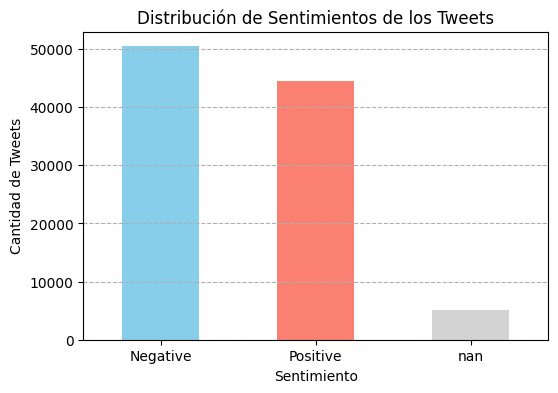


--- Análisis del Precio de Bitcoin ---


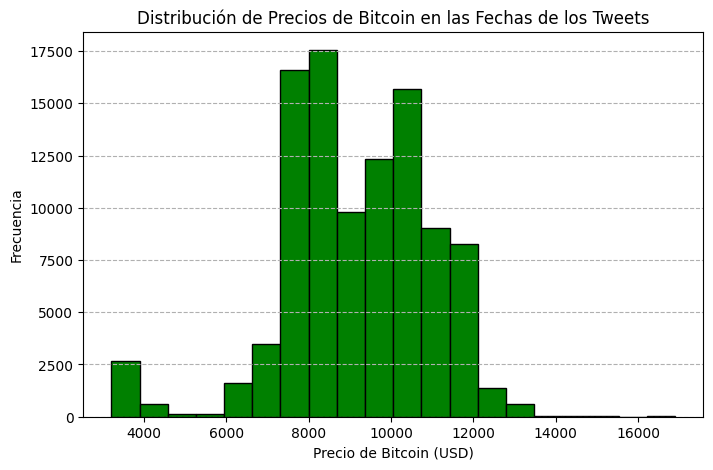

In [ ]:
import matplotlib.pyplot as plt

# 2. Análisis de la variable 'Sentiment'
print("\n--- Análisis de la Variable 'Sentiment' ---")
sentiment_counts = df_tweets['Sentiment'].value_counts(dropna=False) 
print("Distribución de Sentimientos:")
print(sentiment_counts)

# Visualización de la distribución de sentimientos
if not sentiment_counts.empty:
    plt.figure(figsize=(6, 4))
    sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgray'])
    plt.title('Distribución de Sentimientos de los Tweets')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad de Tweets')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()
else:
    print("No hay datos de sentimiento para graficar.")

# Análisis de la variable 'Bitcoin' (Precio)
print("\n--- Análisis del Precio de Bitcoin ---")
if df_tweets['Bitcoin'].notna().sum() > 0: 
    plt.figure(figsize=(8, 5))
    plt.hist(df_tweets['Bitcoin'].dropna(), bins=20, color='green', edgecolor='black')
    plt.title('Distribución de Precios de Bitcoin en las Fechas de los Tweets')
    plt.xlabel('Precio de Bitcoin (USD)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--')
    plt.show()
else:
    print("No hay datos de precio de Bitcoin para graficar el histograma.")


## Relacion entre sentimiento y bitcoin


--- Relación Sentimiento, Precio Bitcoin y Fecha ---

Precio promedio Bitcoin por Sentimiento:
Sentiment
Negative    9109.865026
Positive    9016.054327
Name: Bitcoin, dtype: float64


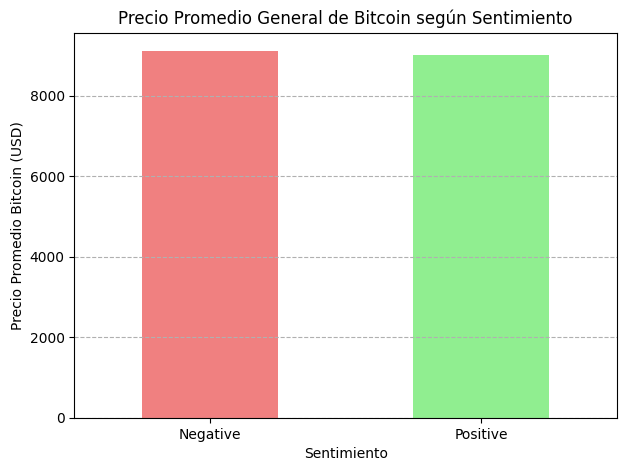


Precio promedio mensual Bitcoin por Sentimiento (primeras filas):
Sentiment       Negative      Positive
Date                                  
2018-01-31  12898.790792  12865.791696
2018-02-28   8961.764118   7304.475187
2018-03-31   9109.977103   9186.534184
2018-04-30   7056.783514   7012.250648
2018-05-31   8647.312455   8366.589231


/var/folders/x7/yqjxlcpn6896ntpm60n8wg4r0000gn/T/ipykernel_52846/2817245663.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price_sentiment = df_temporal.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])['Bitcoin'].mean().unstack(level='Sentiment')


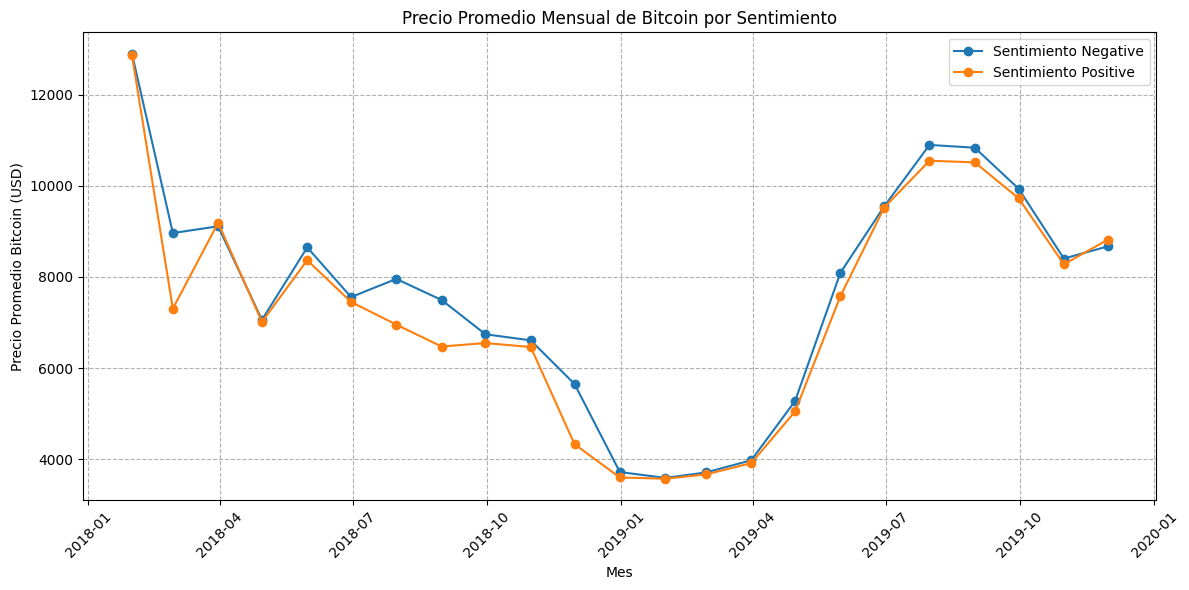

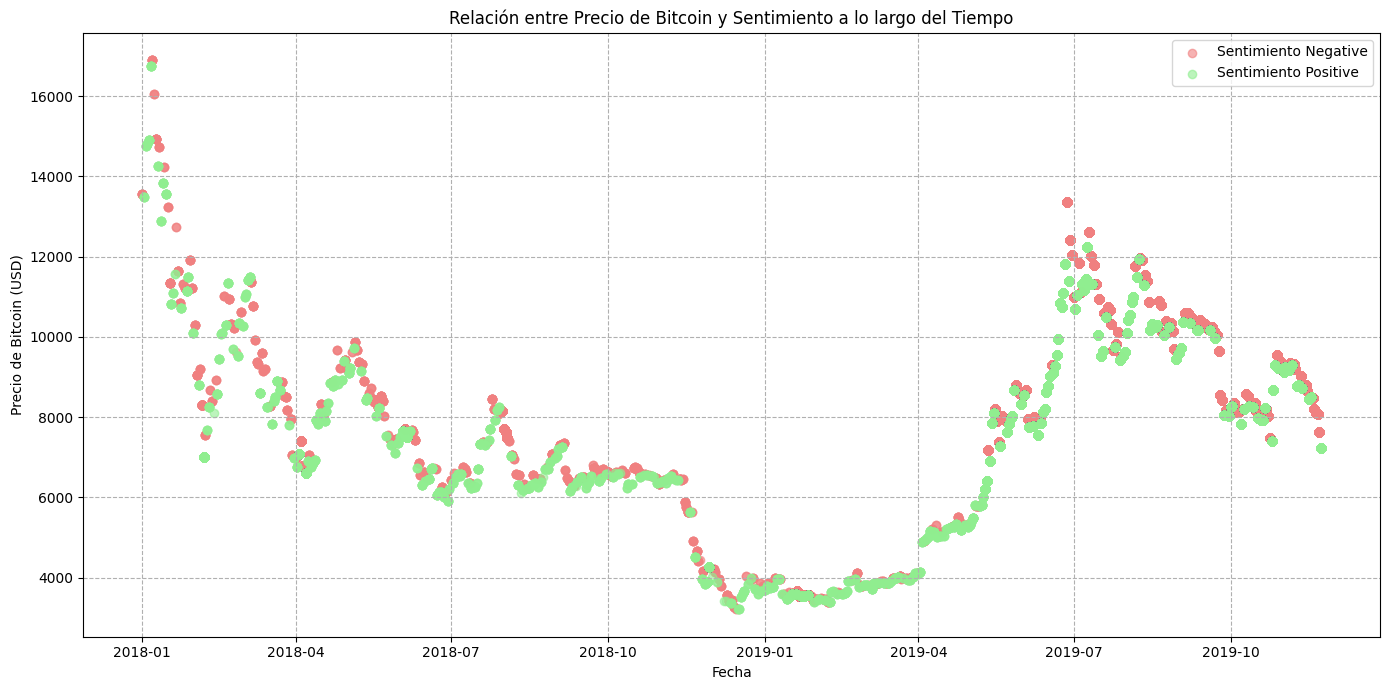

In [ ]:
print("\n--- Relación Sentimiento, Precio Bitcoin y Fecha ---")

# Prepara datos: elimina filas con valores faltantes
df_temporal = df_tweets.dropna(subset=['Sentiment', 'Bitcoin', 'Date']).copy()
df_temporal['Date'] = pd.to_datetime(df_temporal['Date']) 

if df_temporal.empty:
    print("\nNo hay datos suficientes para el análisis de sentimiento, precio y fecha.")
else:
    # 1. Precio promedio de Bitcoin por sentimiento (general)
    mean_price_sentiment = df_temporal.groupby('Sentiment')['Bitcoin'].mean()
    print("\nPrecio promedio Bitcoin por Sentimiento:")
    print(mean_price_sentiment)

    if not mean_price_sentiment.empty:
        colors = {'Positive': 'lightgreen', 'Negative': 'lightcoral', 'Neutral': 'lightgray'}
        plt.figure(figsize=(7, 5))
        mean_price_sentiment.plot(kind='bar', color=[colors.get(s, 'blue') for s in mean_price_sentiment.index])
        plt.title('Precio Promedio General de Bitcoin según Sentimiento')
        plt.xlabel('Sentimiento')
        plt.ylabel('Precio Promedio Bitcoin (USD)')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.show()

    # 2. Precio promedio mensual de Bitcoin por sentimiento
    try:
        monthly_price_sentiment = df_temporal.groupby([pd.Grouper(key='Date', freq='M'), 'Sentiment'])['Bitcoin'].mean().unstack(level='Sentiment')
        if not monthly_price_sentiment.empty:
            print("\nPrecio promedio mensual Bitcoin por Sentimiento (primeras filas):")
            print(monthly_price_sentiment.head())

            plt.figure(figsize=(12, 6))
            for sentiment in monthly_price_sentiment.columns:
                plt.plot(monthly_price_sentiment.index, monthly_price_sentiment[sentiment], marker='o', linestyle='-', label=f'Sentimiento {sentiment}')
            plt.title('Precio Promedio Mensual de Bitcoin por Sentimiento')
            plt.xlabel('Mes')
            plt.ylabel('Precio Promedio Bitcoin (USD)')
            plt.xticks(rotation=45)
            plt.legend()
            plt.grid(True, linestyle='--')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo hay datos suficientes para mostrar el precio promedio mensual por sentimiento.")
    except Exception as e:
        print(f"\nError al agrupar datos por mes y sentimiento: {e}")

    # 3. Relación entre Precio de Bitcoin y Sentimiento a lo largo del tiempo
    plt.figure(figsize=(14, 7))
    sentiments = df_temporal['Sentiment'].unique()
    colors = {'Positive': 'lightgreen', 'Negative': 'lightcoral', 'Neutral': 'lightgray'}

    for sentiment in sentiments:
        subset = df_temporal[df_temporal['Sentiment'] == sentiment]
        if not subset.empty:
            plt.scatter(subset['Date'], subset['Bitcoin'], label=f'Sentimiento {sentiment}', color=colors.get(sentiment, 'blue'), alpha=0.6)

    plt.title('Relación entre Precio de Bitcoin y Sentimiento a lo largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Bitcoin (USD)')
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()

# Analisis por fecha


--- Análisis Temporal (Fechas) ---
Rango de fechas de los tweets: 2018-01-01 00:00:00 a 2019-11-23 00:00:00


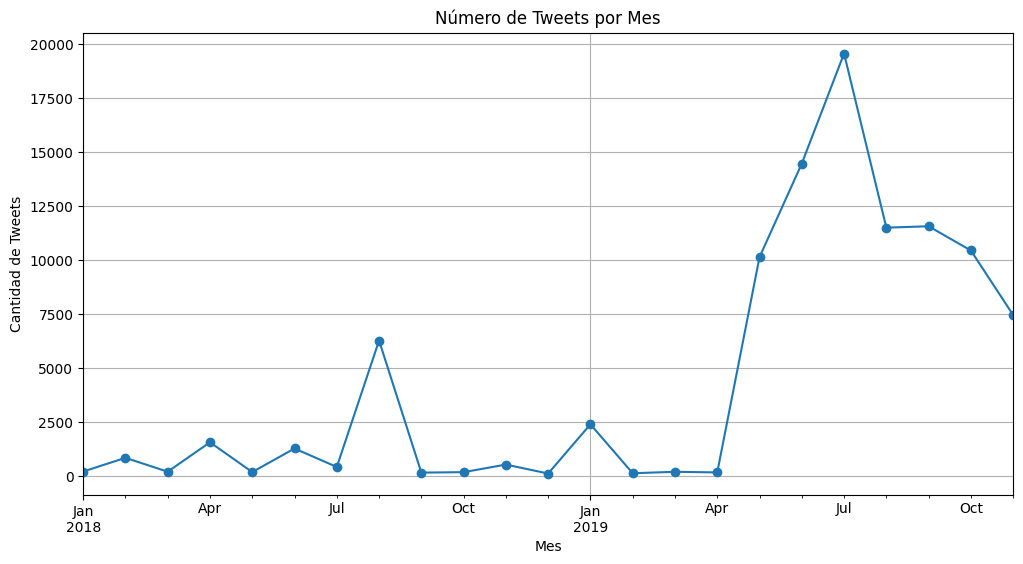

In [ ]:

# 5. Análisis de la columna 'Date'

df_tweets['Date'] = pd.to_datetime(df_tweets['Date'])

print("\n--- Análisis Temporal (Fechas) ---")
print(f"Rango de fechas de los tweets: {df_tweets['Date'].min()} a {df_tweets['Date'].max()}")

# Tweets por mes o año 
if df_tweets['Date'].notna().any():
    tweets_por_mes = df_tweets.groupby(df_tweets['Date'].dt.to_period("M")).size()
    if not tweets_por_mes.empty:
        plt.figure(figsize=(12, 6))
        tweets_por_mes.plot(kind='line', marker='o')
        plt.title('Número de Tweets por Mes')
        plt.xlabel('Mes')
        plt.ylabel('Cantidad de Tweets')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos de fecha para graficar tweets por mes.")
else:
    print("Columna 'Date' no disponible o vacía para análisis temporal.")
